# Part 2.17: Supervised Learning - Evaluation Metrics for Classification

For classification tasks, accuracy is often not enough, especially when dealing with imbalanced datasets. This notebook covers the essential metrics for evaluating a classifier's performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create a dataset and model
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.decision_function(X_test)

### Confusion Matrix
A table that describes the performance of a classification model. It breaks down predictions into True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

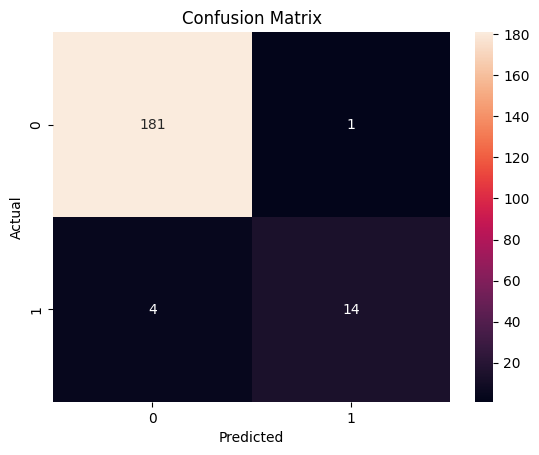

In [2]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Accuracy, Precision, Recall, and F1-Score
- **Accuracy**: (TP+TN) / Total. Can be misleading for imbalanced data.
- **Precision**: TP / (TP+FP). Of all positive predictions, how many were actually positive? (Measures relevance)
- **Recall (Sensitivity)**: TP / (TP+FN). Of all actual positives, how many did the model identify? (Measures completeness)
- **F1-Score**: The harmonic mean of Precision and Recall. A good balance between the two.

In [3]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       182
           1       0.93      0.78      0.85        18

    accuracy                           0.97       200
   macro avg       0.96      0.89      0.92       200
weighted avg       0.97      0.97      0.97       200



### ROC Curve and AUC
The **Receiver Operating Characteristic (ROC)** curve plots the True Positive Rate (Recall) vs. the False Positive Rate at various threshold settings. The **Area Under the Curve (AUC)** provides an aggregate measure of performance across all possible classification thresholds.

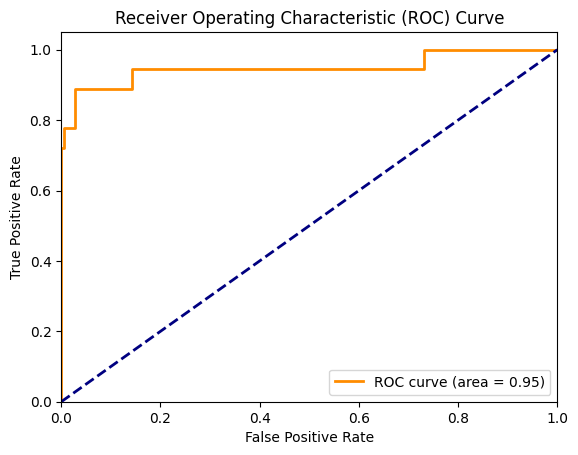

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve
Plots the precision vs. the recall for different thresholds. This is a better metric to use for imbalanced classification problems.

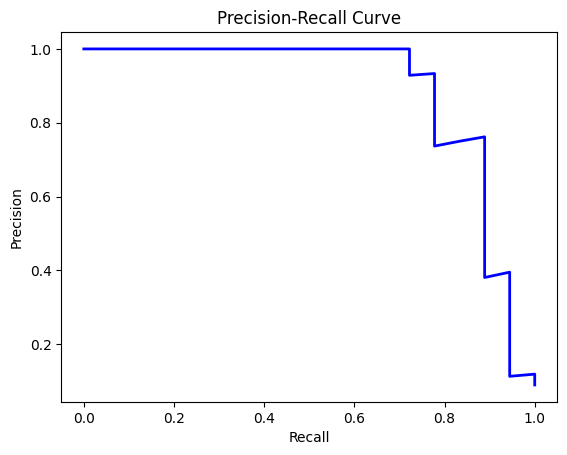

In [5]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()